In [5]:
from TumorGrowthToolkit.FK import Solver as FKSolver
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import time
import scipy.ndimage

# Generate base random data
base_data = np.random.rand(100, 100, 100)
# Apply a Gaussian filter for smooth transitions
wm_data = scipy.ndimage.gaussian_filter(base_data, sigma=3)
# Ensure gm_data is normalized between 0 and 1
wm_data = (wm_data - np.min(wm_data)) / (np.max(wm_data) - np.min(wm_data))
wm_data = wm_data*wm_data
# Calculate white matter data as the complementary probability
gm_data = 1 - wm_data


# Set up parameters
parameters = {
    'Dw': 1.5,          # Diffusion coefficient for white matter
    'rho': 0.08,         # Proliferation rate
    'RatioDw_Dg': 100000,  # Ratio of diffusion coefficients in white and grey matter
    'gm': gm_data,      # Grey matter data
    'wm': wm_data,      # White matter data
    'NxT1_pct': 0.5,    # tumor position [%]
    'NyT1_pct': 0.6,
    'NzT1_pct': 0.5,
    'init_scale': 1., #scale of the initial gaussian
    'resolution_factor': 0.6, #resultion scaling for calculations
    'th_matter': 0.1, #when to stop diffusing: at th_matter > gm+wm
    'verbose': True, #printing timesteps 
    'time_series_solution_Nt': 64 # number of timesteps in the output
    
}

# Create custom color maps
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap', ['black', 'white'], 256)
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap2', ['black', 'green', 'yellow', 'red'], 256)

# Calculate the slice index
NzT = int(parameters['NzT1_pct'] * gm_data.shape[2])

# Plotting function
def plot_tumor_states(wm_data, initial_state, final_state, slice_index):
    plt.figure(figsize=(12, 6))

    # Plot initial state
    plt.subplot(1, 2, 1)
    plt.imshow(wm_data[:, :, slice_index], cmap=cmap1, vmin=0, vmax=1, alpha=1)
    plt.imshow(initial_state[:, :, slice_index], cmap=cmap2, vmin=0, vmax=1, alpha=0.65)
    plt.title("Initial Tumor State")

    # Plot final state
    plt.subplot(1, 2, 2)
    plt.imshow(wm_data[:, :, slice_index], cmap=cmap1, vmin=0, vmax=1, alpha=1)
    plt.imshow(final_state[:, :, slice_index], cmap=cmap2, vmin=0, vmax=1, alpha=0.65)
    plt.title("Final Tumor State")
    plt.show()
    

def plot_time_series(wm_data, time_series_data, slice_index):
    plt.figure(figsize=(24, 12))

    # Generate 8 indices evenly spaced across the time series length
    time_points = np.linspace(0, time_series_data.shape[0] - 1, 8, dtype=int)

    for i, t in enumerate(time_points):
        plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns, current subplot index
        plt.imshow(wm_data[:, :, slice_index], cmap=cmap1, vmin=0, vmax=1, alpha=1)
        plt.imshow(time_series_data[t, :, :, slice_index], cmap=cmap2, vmin=0, vmax=1, alpha=0.65)
        plt.title(f"Time Slice {t + 1}")

    plt.tight_layout()
    plt.show()

Number of simulation timesteps: 532
Execution Time: 3 seconds
Simulation successful!


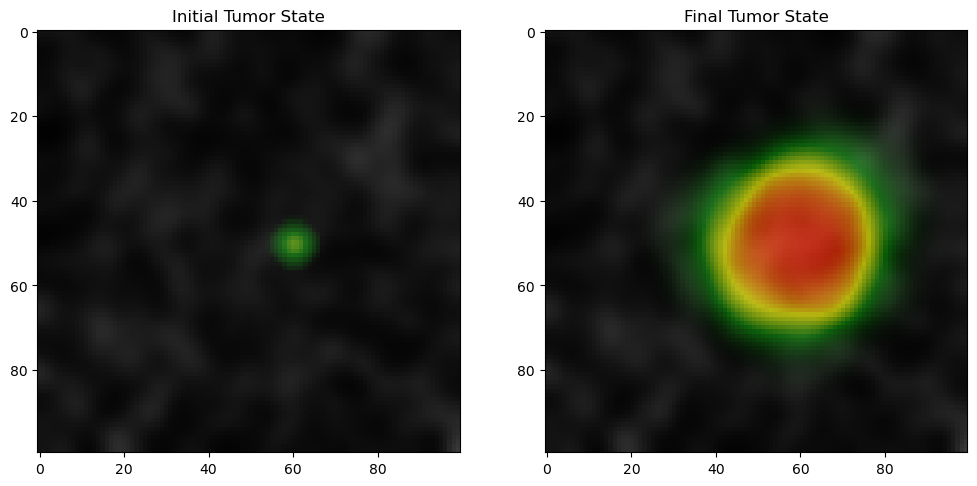

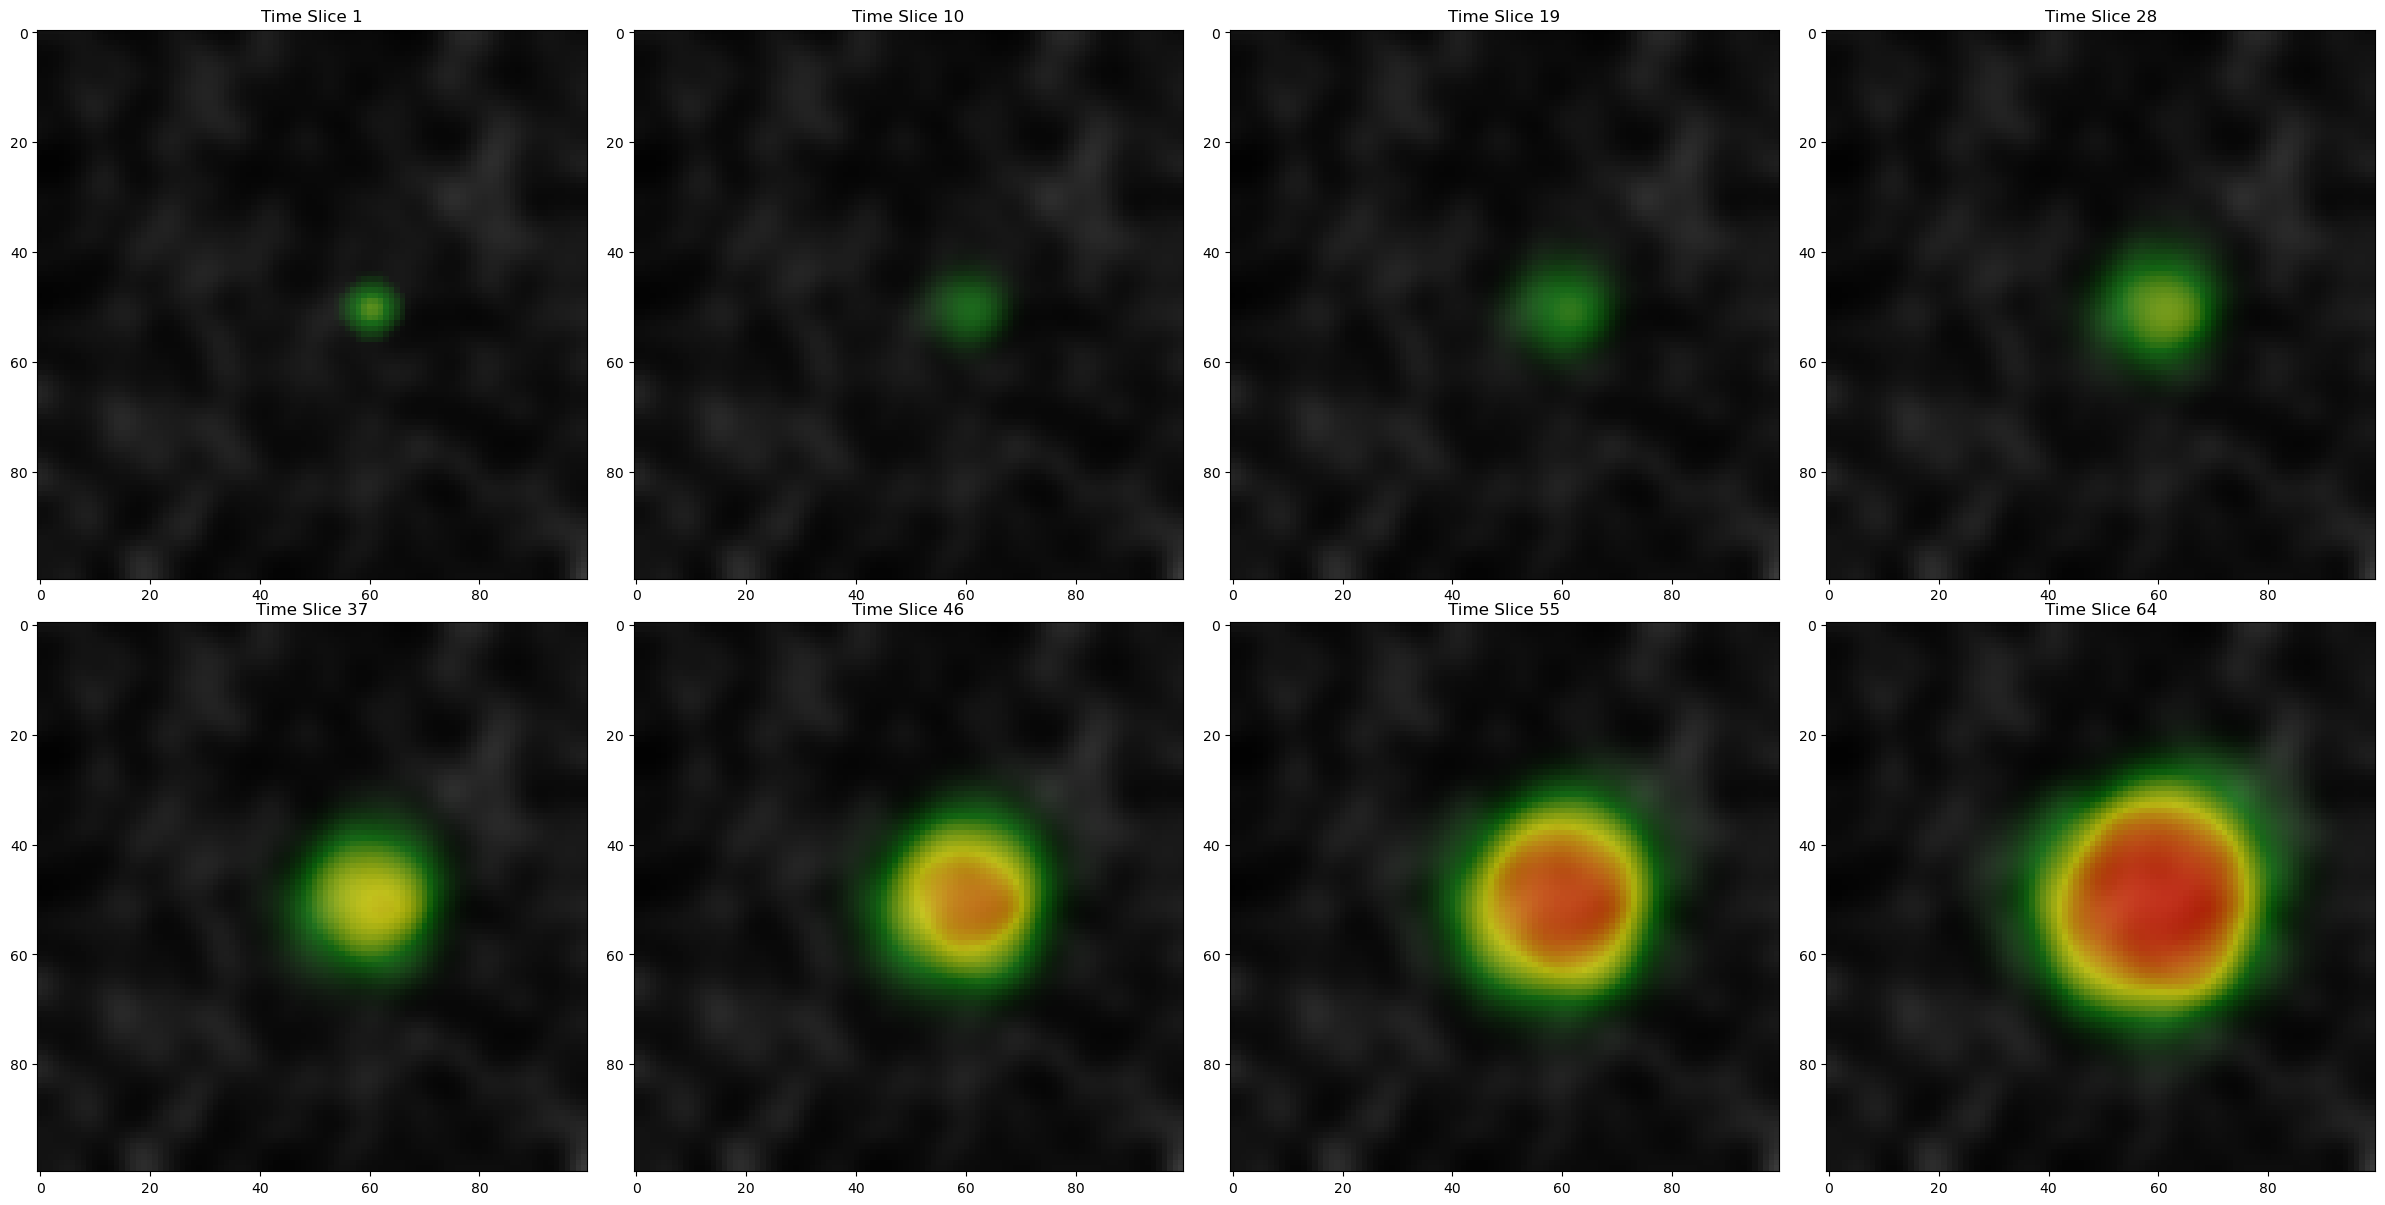

In [6]:
# Run the FK_solver and plot the results
start_time = time.time()
fk_solver = FKSolver(parameters)
result = fk_solver.solve()
end_time = time.time()  # Store the end time
execution_time = int(end_time - start_time)  # Calculate the difference

print(f"Execution Time: {execution_time} seconds")
if result['success']:
    print("Simulation successful!")
    plot_tumor_states(wm_data, result['initial_state'], result['final_state'], NzT)
    plot_time_series(wm_data,result['time_series'], NzT)
else:
    print("Error occurred:", result['error'])